# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import pickle

We import the data from the pickle file as JSON:

In [2]:
data_json = pd.read_pickle('summoner_stats.pkl')

## Dataframes generation

We will generate two raw dataframe: one of them will contain the preffered champion statdistics and the other one the stadistics for all champions.

In [3]:
def build_dataframes(json):
    pref_list = []
    total_list = []
    for index in json:
        pref_dict = json[index]['pref_champ']['stats']
        pref_dict['summID'] = index
        pref_dict['champID'] = json[index]['pref_champ']['id']
        pref_list.append(pref_dict)
        total_dict = json[index]['total']['stats']
        total_dict['summID'] = index
        total_list.append(total_dict)
    df_pc = pd.DataFrame(pref_list).set_index('summID')
    df_total = pd.DataFrame(total_list).set_index('summID')
    return df_pc, df_total

In [4]:
df_pc, df_total = build_dataframes(data_json)

In [5]:
def put_elos(json, df):
    list_league, list_division = [], []
    for index in df.index:
        values = json[index]
        if values == '':
            league, division = [np.nan]*2
        else:
            league, division = values.split('_')
        list_league.append(league)
        list_division.append(division)
    
    df['league'] = list_league
    df['division'] = list_division
            
    return df

data_json = pd.read_pickle('summoner_elos.pkl')
df_pc = put_elos( data_json, df_pc)
df_total = put_elos( data_json, df_total)

In [6]:
data_json = pd.read_pickle('champion_tags.pkl')
def rol_of_champ(json, df):
    
    dict_champ = {}
    for i in data_json['data']:
        dict_champ[data_json['data'][i]['id']] =data_json['data'][i]['tags']
    
    list_1st_rol, list_2n_rol = [], []
    for index in df.index:
        values = dict_champ[df.loc[index]['champID']]
        if len(values) == 1:
            rol_1st, rol_2nd = values*2
        else:
            rol_1st, rol_2nd  = values
        list_1st_rol.append(rol_1st)
        list_2n_rol.append(rol_2nd)
    
    df['champ1R'] = list_1st_rol
    df['champ2R'] = list_1st_rol
            
    return df
df_pc = rol_of_champ( data_json, df_pc)

In [7]:
df_pc = df_pc.dropna(axis=0)#, subset = ['league'])
df_total = df_total.dropna(axis = 0, subset = ['league'])

df_pc.league.value_counts()

platinum    8212
silver      5529
bronze      5175
gold        4910
diamond     4616
master        28
Name: league, dtype: int64

In [8]:
from sklearn import preprocessing
encoLeague, encoDiv = preprocessing.LabelEncoder(), preprocessing.LabelEncoder()
encoLeague.fit(['bronze', 'silver', 'gold', 'platinum', 'diamond', 'master'])
print('League Encoder Classes: ', encoLeague.classes_,
     '\nCodification of Classes: ',   encoLeague.transform( encoLeague.classes_))
encoDiv.fit(['1', '2', '3', '4', '5'])
print('Division Encoder Classes: ', encoDiv.classes_,
     '\nCodification of Classes: ',   encoDiv.transform( encoDiv.classes_))

df_pc['league'] = encoLeague.transform(df_pc['league'])
df_total['league'] = encoLeague.transform(df_total['league'])

df_pc['division'] = encoDiv.transform(df_pc['division'])
df_total['division'] = encoDiv.transform(df_total['division'])


League Encoder Classes:  ['bronze' 'diamond' 'gold' 'master' 'platinum' 'silver'] 
Codification of Classes:  [0 1 2 3 4 5]
Division Encoder Classes:  ['1' '2' '3' '4' '5'] 
Codification of Classes:  [0 1 2 3 4]


In [9]:
encoTags = preprocessing.LabelEncoder()
encoTags.fit(df_pc['champ1R'].unique())
print('League Encoder Classes: ', encoTags.classes_, 
      '\nCodification of Classes: ',   encoTags.transform( encoTags.classes_))
df_pc['champ1R'] = encoTags.transform(df_pc['champ1R'])
df_pc['champ2R'] = encoTags.transform(df_pc['champ2R'])


League Encoder Classes:  ['Assassin' 'Fighter' 'Mage' 'Marksman' 'Support' 'Tank'] 
Codification of Classes:  [0 1 2 3 4 5]


We inspect the columns for the 'Preferred champion" dataframe. We also set the "Summoner ID" as the index. 

In [10]:
print(df_pc.columns)
df_pc.head()

Index(['champID', 'maxChampionsKilled', 'maxNumDeaths',
       'mostChampionKillsPerSession', 'mostSpellsCast', 'totalAssists',
       'totalChampionKills', 'totalDamageDealt', 'totalDamageTaken',
       'totalDeathsPerSession', 'totalDoubleKills', 'totalFirstBlood',
       'totalGoldEarned', 'totalMagicDamageDealt', 'totalMinionKills',
       'totalPentaKills', 'totalPhysicalDamageDealt', 'totalQuadraKills',
       'totalSessionsLost', 'totalSessionsPlayed', 'totalSessionsWon',
       'totalTripleKills', 'totalTurretsKilled', 'totalUnrealKills', 'league',
       'division', 'champ1R', 'champ2R'],
      dtype='object')


champID  maxChampionsKilled  maxNumDeaths  \
summID                                                
43878231      222                  29            15   
58082410       98                  13            13   
20417927      245                  18            12   
52542846      107                  27            13   
30131741       12                   6            10   

          mostChampionKillsPerSession  mostSpellsCast  totalAssists  \
summID                                                                
43878231                           29               0          1334   
58082410                           13               0           783   
20417927                           18               0           508   
52542846                           27               0           722   
30131741                            6               0           667   

          totalChampionKills  totalDamageDealt  totalDamageTaken  \
summID                                                             
43878231                1408          28516412           3416235   
58082410                 286           4718297           1764765   
20417927                 537           8689132           1533400   
52542846                1277          20282144           3033515   
30131741                  69           1438520           1210308   

          totalDeathsPerSession   ...     totalSessionsLost  \
summID                            ...                         
43878231                   1089   ...                    79   
58082410                    324   ...                    28   
20417927                    296   ...                    31   
52542846                    710   ...                    39   
30131741                    176   ...                    21   

          totalSessionsPlayed  totalSessionsWon  totalTripleKills  \
summID                                                              
43878231                  159                80                41   
58082410                   57                29                 2   
20417927                   64                33                13   
52542846                  115                76                33   
30131741                   52                31                 0   

          totalTurretsKilled  totalUnrealKills  league  division  champ1R  \
summID                                                                      
43878231                 303                 0       4         4        3   
58082410                  27                 0       0         0        5   
20417927                  49                 0       1         3        0   
52542846                 113                 0       1         3        0   
30131741                  17                 0       4         3        5   

          champ2R  
summID             
43878231        3  
58082410        5  
20417927        0  
52542846        0  
30131741        5  

[5 rows x 28 columns]

We reorder the columns and drop some of them like the 0 value stats (deprecated data from the Riot API) and unrelevant data ('unreal kills', 'games against IA', etc..)

In [11]:
df_pc = df_pc[['champID', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 
               'totalMinionKills', 'totalTurretsKilled', 'totalPhysicalDamageDealt', 'totalMagicDamageDealt', 
               'totalDamageTaken', 'totalDeathsPerSession', 'maxNumDeaths', 'totalAssists', 'totalChampionKills', 'totalDoubleKills', 
               'totalTripleKills', 'totalQuadraKills', 'totalPentaKills', 'mostChampionKillsPerSession', 'league', 'champ1R', 'champ2R']]
print(df_pc.dtypes)
df_pc.head()

champID                        int64
totalSessionsPlayed            int64
totalSessionsWon               int64
totalSessionsLost              int64
totalGoldEarned                int64
totalMinionKills               int64
totalTurretsKilled             int64
totalPhysicalDamageDealt       int64
totalMagicDamageDealt          int64
totalDamageTaken               int64
totalDeathsPerSession          int64
maxNumDeaths                   int64
totalAssists                   int64
totalChampionKills             int64
totalDoubleKills               int64
totalTripleKills               int64
totalQuadraKills               int64
totalPentaKills                int64
mostChampionKillsPerSession    int64
league                         int64
champ1R                        int64
champ2R                        int64
dtype: object


champID  totalSessionsPlayed  totalSessionsWon  totalSessionsLost  \
summID                                                                        
43878231      222                  159                80                 79   
58082410       98                   57                29                 28   
20417927      245                   64                33                 31   
52542846      107                  115                76                 39   
30131741       12                   52                31                 21   

          totalGoldEarned  totalMinionKills  totalTurretsKilled  \
summID                                                            
43878231          2112959             29154                 303   
58082410           606233              4759                  27   
20417927           747381              9027                  49   
52542846          1539420             12375                 113   
30131741           436198              2259                  17   

          totalPhysicalDamageDealt  totalMagicDamageDealt  totalDamageTaken  \
summID                                                                        
43878231                  26721513                1694404           3416235   
58082410                   1676750                2942388           1764765   
20417927                   1392566                6949857           1533400   
52542846                  17072504                1982929           3033515   
30131741                    444646                 753341           1210308   

           ...     totalAssists  totalChampionKills  totalDoubleKills  \
summID     ...                                                          
43878231   ...             1334                1408               192   
58082410   ...              783                 286                13   
20417927   ...              508                 537                50   
52542846   ...              722                1277               168   
30131741   ...              667                  69                 0   

          totalTripleKills  totalQuadraKills  totalPentaKills  \
summID                                                          
43878231                41                11                1   
58082410                 2                 0                0   
20417927                13                 1                0   
52542846                33                 4                1   
30131741                 0                 0                0   

          mostChampionKillsPerSession  league  champ1R  champ2R  
summID                                                           
43878231                           29       4        3        3  
58082410                           13       0        5        5  
20417927                           18       1        0        0  
52542846                           27       1        0        0  
30131741                            6       4        5        5  

[5 rows x 22 columns]

In [12]:
print(df_pc.columns)
df_pc.head()

Index(['champID', 'totalSessionsPlayed', 'totalSessionsWon',
       'totalSessionsLost', 'totalGoldEarned', 'totalMinionKills',
       'totalTurretsKilled', 'totalPhysicalDamageDealt',
       'totalMagicDamageDealt', 'totalDamageTaken', 'totalDeathsPerSession',
       'maxNumDeaths', 'totalAssists', 'totalChampionKills',
       'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills',
       'totalPentaKills', 'mostChampionKillsPerSession', 'league', 'champ1R',
       'champ2R'],
      dtype='object')


champID  totalSessionsPlayed  totalSessionsWon  totalSessionsLost  \
summID                                                                        
43878231      222                  159                80                 79   
58082410       98                   57                29                 28   
20417927      245                   64                33                 31   
52542846      107                  115                76                 39   
30131741       12                   52                31                 21   

          totalGoldEarned  totalMinionKills  totalTurretsKilled  \
summID                                                            
43878231          2112959             29154                 303   
58082410           606233              4759                  27   
20417927           747381              9027                  49   
52542846          1539420             12375                 113   
30131741           436198              2259                  17   

          totalPhysicalDamageDealt  totalMagicDamageDealt  totalDamageTaken  \
summID                                                                        
43878231                  26721513                1694404           3416235   
58082410                   1676750                2942388           1764765   
20417927                   1392566                6949857           1533400   
52542846                  17072504                1982929           3033515   
30131741                    444646                 753341           1210308   

           ...     totalAssists  totalChampionKills  totalDoubleKills  \
summID     ...                                                          
43878231   ...             1334                1408               192   
58082410   ...              783                 286                13   
20417927   ...              508                 537                50   
52542846   ...              722                1277               168   
30131741   ...              667                  69                 0   

          totalTripleKills  totalQuadraKills  totalPentaKills  \
summID                                                          
43878231                41                11                1   
58082410                 2                 0                0   
20417927                13                 1                0   
52542846                33                 4                1   
30131741                 0                 0                0   

          mostChampionKillsPerSession  league  champ1R  champ2R  
summID                                                           
43878231                           29       4        3        3  
58082410                           13       0        5        5  
20417927                           18       1        0        0  
52542846                           27       1        0        0  
30131741                            6       4        5        5  

[5 rows x 22 columns]

Now we perform the same actions for the 'All champions' dataframe.

In [13]:
df_total = df_total[['totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 
               'totalMinionKills', 'totalNeutralMinionsKilled', 'totalTurretsKilled', 'totalPhysicalDamageDealt', 
                'totalMagicDamageDealt', 'totalDamageTaken', 'totalHeal', 'totalDeathsPerSession', 'totalAssists', 
                'totalChampionKills', 'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills', 'totalPentaKills',
                    'league']]
print(df_total.dtypes)
df_total.head()

totalSessionsPlayed          int64
totalSessionsWon             int64
totalSessionsLost            int64
totalGoldEarned              int64
totalMinionKills             int64
totalNeutralMinionsKilled    int64
totalTurretsKilled           int64
totalPhysicalDamageDealt     int64
totalMagicDamageDealt        int64
totalDamageTaken             int64
totalHeal                    int64
totalDeathsPerSession        int64
totalAssists                 int64
totalChampionKills           int64
totalDoubleKills             int64
totalTripleKills             int64
totalQuadraKills             int64
totalPentaKills              int64
league                       int64
dtype: object


totalSessionsPlayed  totalSessionsWon  totalSessionsLost  \
summID                                                               
43878231                 1236               618                618   
58082410                  207               107                100   
20417927                  985               527                458   
52542846                  501               285                216   
30131741                  434               223                211   

          totalGoldEarned  totalMinionKills  totalNeutralMinionsKilled  \
summID                                                                   
43878231         14266699            141919                      27825   
58082410          2362541             16409                       5118   
20417927         11806221            151119                      19023   
52542846          6623795             68049                      18249   
30131741          4475441             27097                      11488   

          totalTurretsKilled  totalPhysicalDamageDealt  totalMagicDamageDealt  \
summID                                                                          
43878231                1218                 101615161               40040339   
58082410                 120                  12436059                8817581   
20417927                1094                  78386272               56946735   
52542846                 697                  63882777               14954110   
30131741                 262                  15016342               18231467   

          totalDamageTaken  totalHeal  totalDeathsPerSession  totalAssists  \
summID                                                                       
43878231          31803568    4103947                   7702         12288   
58082410           6388328    1002259                   1446          2418   
20417927          23454749    3699087                   5270          8602   
52542846          14080579    2037576                   3291          3783   
30131741          10446877    2041822                   2103          4653   

          totalChampionKills  totalDoubleKills  totalTripleKills  \
summID                                                             
43878231                7636               821               128   
58082410                1185                70                 5   
20417927                6536               674                95   
52542846                5009               638               141   
30131741                1675               104                11   

          totalQuadraKills  totalPentaKills  league  
summID                                               
43878231                23                3       4  
58082410                 0                0       0  
20417927                19                1       1  
52542846                30                8       1  
30131741                 3                0       4

## Data filtering and standarization by sessions played

We only consider the accounts that have 50 or more games played. 

In [14]:
df_pc = df_pc[df_pc.totalSessionsPlayed >= 50]
df_total = df_total[df_total.totalSessionsPlayed >= 50]

The "total" stadisitics are calculated as the sum of the totalSessionsPlayed so we must calculate the average data for all games.

In [15]:
df_pc['GoldEarned'] = df_pc['totalGoldEarned'] / df_pc['totalSessionsPlayed']
df_pc['MinionKills'] = df_pc['totalMinionKills'] / df_pc['totalSessionsPlayed']             
df_pc['PhysicalDamageDealt'] = df_pc['totalPhysicalDamageDealt'] / df_pc['totalSessionsPlayed']     
df_pc['MagicDamageDealt'] = df_pc['totalMagicDamageDealt'] / df_pc['totalSessionsPlayed']  
df_pc['DamageTaken'] = df_pc['totalDamageTaken'] / df_pc['totalSessionsPlayed']              
df_pc['DoubleKills'] = df_pc['totalDoubleKills'] / df_pc['totalSessionsPlayed']
df_pc['TripleKills'] = df_pc['totalTripleKills'] / df_pc['totalSessionsPlayed']
df_pc['QuadraKills'] = df_pc['totalQuadraKills'] / df_pc['totalSessionsPlayed']
df_pc['PentaKills'] = df_pc['totalPentaKills'] / df_pc['totalSessionsPlayed']
df_pc['TurretsKilled'] = df_pc['totalTurretsKilled'] / df_pc['totalSessionsPlayed']

df_total['GoldEarned'] = df_total['totalGoldEarned'] / df_total['totalSessionsPlayed']
df_total['MinionKills'] = df_total['totalMinionKills'] / df_total['totalSessionsPlayed']             
df_total['PhysicalDamageDealt'] = df_total['totalPhysicalDamageDealt'] / df_total['totalSessionsPlayed']     
df_total['MagicDamageDealt'] = df_total['totalMagicDamageDealt'] / df_total['totalSessionsPlayed']
df_total['DamageTaken'] = df_total['totalDamageTaken'] / df_total['totalSessionsPlayed']
df_total['DoubleKills'] = df_total['totalDoubleKills'] / df_total['totalSessionsPlayed']
df_total['TripleKills'] = df_total['totalTripleKills'] / df_total['totalSessionsPlayed']
df_total['QuadraKills'] = df_total['totalQuadraKills'] / df_total['totalSessionsPlayed']
df_total['PentaKills'] = df_total['totalPentaKills'] / df_total['totalSessionsPlayed']
df_total['TurretsKilled'] = df_total['totalTurretsKilled'] / df_total['totalSessionsPlayed']
df_total['Heal'] = df_total['totalHeal'] / df_total['totalSessionsPlayed']
df_total['NeutralMinionsKilled	'] = df_total['totalNeutralMinionsKilled'] / df_total['totalSessionsPlayed']

### KDA calculation

One important metric in competitive games as League of Legends is the KDA (Kills-Deaths-Assists) ratio. For a given player when can calculate the KDA for the ranked Season 5 as 
\begin{equation}
KDA = \frac{totalChampionKills + totalAssists}{totalDeathsPerSession} 
\end{equation}

In [16]:
df_pc['KDA'] = (df_pc['totalChampionKills'] + df_pc['totalAssists']) / df_pc['totalDeathsPerSession']

In [17]:
df_pc[['KDA', 'totalChampionKills', 'totalAssists', 'totalDeathsPerSession']].head()

KDA  totalChampionKills  totalAssists  totalDeathsPerSession
summID                                                                     
43878231  2.517906                1408          1334                   1089
58082410  3.299383                 286           783                    324
20417927  3.530405                 537           508                    296
52542846  2.815493                1277           722                    710
30131741  4.181818                  69           667                    176

In [18]:
df_total['totalKDA'] = (df_total['totalChampionKills'] + df_total['totalAssists']) / df_total['totalDeathsPerSession']

In [19]:
df_total[['totalKDA', 'totalChampionKills', 'totalAssists', 'totalDeathsPerSession']].head()

totalKDA  totalChampionKills  totalAssists  totalDeathsPerSession
summID                                                                     
43878231  2.586861                7636         12288                   7702
58082410  2.491701                1185          2418                   1446
20417927  2.872486                6536          8602                   5270
52542846  2.671528                5009          3783                   3291
30131741  3.009035                1675          4653                   2103

### Win rate calculation

We calculate the Win Rate percentage per player for both dataframes (it will be the same as they are the same players).

In [20]:
df_pc['WinRate'] = df_pc['totalSessionsWon'] / df_pc['totalSessionsPlayed']

In [21]:
df_pc[['WinRate', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost']].head()

WinRate  totalSessionsPlayed  totalSessionsWon  totalSessionsLost
summID                                                                      
43878231  0.503145                  159                80                 79
58082410  0.508772                   57                29                 28
20417927  0.515625                   64                33                 31
52542846  0.660870                  115                76                 39
30131741  0.596154                   52                31                 21

In [22]:
df_total['WinRate'] = df_pc['totalSessionsWon'] / df_pc['totalSessionsPlayed']

In [23]:
df_total[['WinRate', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost']].head()

WinRate  totalSessionsPlayed  totalSessionsWon  totalSessionsLost
summID                                                                      
43878231  0.503145                 1236               618                618
58082410  0.508772                  207               107                100
20417927  0.515625                  985               527                458
52542846  0.660870                  501               285                216
30131741  0.596154                  434               223                211

### Drop the unnecessary data

In [24]:
df_pc.drop(df_pc[['totalChampionKills', 'totalTurretsKilled', 'totalAssists', 'totalDeathsPerSession', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 'totalMinionKills', 'totalPhysicalDamageDealt', 'totalMagicDamageDealt','totalDamageTaken', 'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills', 'totalPentaKills']], axis=1, inplace=True)

In [25]:
df_total.drop(df_total[['totalHeal' ,'totalNeutralMinionsKilled','totalChampionKills', 'totalTurretsKilled', 'totalAssists', 'totalDeathsPerSession', 'totalSessionsPlayed', 'totalSessionsWon', 'totalSessionsLost', 'totalGoldEarned', 'totalMinionKills', 'totalPhysicalDamageDealt', 'totalMagicDamageDealt','totalDamageTaken', 'totalDoubleKills', 'totalTripleKills', 'totalQuadraKills', 'totalPentaKills']], axis=1, inplace=True)

## Dataframe description 

In [26]:
df_pc.head()

champID  maxNumDeaths  mostChampionKillsPerSession  league  champ1R  \
summID                                                                          
43878231      222            15                           29       4        3   
58082410       98            13                           13       0        5   
20417927      245            12                           18       1        0   
52542846      107            13                           27       1        0   
30131741       12            10                            6       4        5   

          champ2R    GoldEarned  MinionKills  PhysicalDamageDealt  \
summID                                                              
43878231        3  13289.050314   183.358491        168059.830189   
58082410        5  10635.666667    83.491228         29416.666667   
20417927        0  11677.828125   141.046875         21758.843750   
52542846        0  13386.260870   107.608696        148456.556522   
30131741        5   8388.423077    43.442308          8550.884615   

          MagicDamageDealt   DamageTaken  DoubleKills  TripleKills  \
summID                                                               
43878231      10656.628931  21485.754717     1.207547     0.257862   
58082410      51620.842105  30960.789474     0.228070     0.035088   
20417927     108591.515625  23959.375000     0.781250     0.203125   
52542846      17242.860870  26378.391304     1.460870     0.286957   
30131741      14487.326923  23275.153846     0.000000     0.000000   

          QuadraKills  PentaKills  TurretsKilled       KDA   WinRate  
summID                                                                
43878231     0.069182    0.006289       1.905660  2.517906  0.503145  
58082410     0.000000    0.000000       0.473684  3.299383  0.508772  
20417927     0.015625    0.000000       0.765625  3.530405  0.515625  
52542846     0.034783    0.008696       0.982609  2.815493  0.660870  
30131741     0.000000    0.000000       0.326923  4.181818  0.596154

In [27]:
df_total.head()

league    GoldEarned  MinionKills  PhysicalDamageDealt  \
summID                                                             
43878231       4  11542.636731   114.821197         82212.913430   
58082410       0  11413.241546    79.270531         60077.579710   
20417927       1  11986.011168   153.420305         79579.971574   
52542846       1  13221.147705   135.826347        127510.532934   
30131741       4  10312.076037    62.435484         34599.866359   

          MagicDamageDealt   DamageTaken  DoubleKills  TripleKills  \
summID                                                               
43878231      32395.096278  25731.042071     0.664239     0.103560   
58082410      42597.009662  30861.487923     0.338164     0.024155   
20417927      57813.944162  23811.927919     0.684264     0.096447   
52542846      29848.522954  28104.948104     1.273453     0.281437   
30131741      42007.988479  24071.145161     0.239631     0.025346   

          QuadraKills  PentaKills  TurretsKilled         Heal  \
summID                                                          
43878231     0.018608    0.002427       0.985437  3320.345469   
58082410     0.000000    0.000000       0.579710  4841.830918   
20417927     0.019289    0.001015       1.110660  3755.418274   
52542846     0.059880    0.015968       1.391218  4067.017964   
30131741     0.006912    0.000000       0.603687  4704.658986   

          NeutralMinionsKilled\t  totalKDA   WinRate  
summID                                                
43878231               22.512136  2.586861  0.503145  
58082410               24.724638  2.491701  0.508772  
20417927               19.312690  2.872486  0.515625  
52542846               36.425150  2.671528  0.660870  
30131741               26.470046  3.009035  0.596154

### Mean, std, min, max and percentiles

In [28]:
df_pc.describe()

champID  maxNumDeaths  mostChampionKillsPerSession        league  \
count  19376.000000  19376.000000                 19376.000000  19376.000000   
mean     123.067816     14.917011                    21.008516      2.711808   
std      112.174579      3.101571                     7.739186      1.799337   
min        1.000000      6.000000                     2.000000      0.000000   
25%       53.000000     13.000000                    17.000000      1.000000   
50%       89.000000     15.000000                    22.000000      4.000000   
75%      157.000000     17.000000                    26.000000      4.000000   
max      432.000000     47.000000                    57.000000      5.000000   

            champ1R       champ2R    GoldEarned   MinionKills  \
count  19376.000000  19376.000000  19376.000000  19376.000000   
mean       2.256555      2.256555  12273.157339    130.469778   
std        1.503641      1.503641   1543.327483     69.701434   
min        0.000000      0.000000   6060.000000      4.178571   
25%        1.000000      1.000000  11529.530749     55.401178   
50%        2.000000      2.000000  12617.229146    151.064097   
75%        3.000000      3.000000  13344.580723    192.073776   
max        5.000000      5.000000  20201.985507    272.441176   

       PhysicalDamageDealt  MagicDamageDealt   DamageTaken   DoubleKills  \
count         19376.000000      19376.000000  19376.000000  19376.000000   
mean          84843.377094      42483.932835  24929.761000      0.779273   
std           64992.968552      45235.406097   5832.858027      0.492057   
min            1669.872814         32.338235   3261.898396      0.000000   
25%           15997.206801       9772.550694  20689.609463      0.418114   
50%           92345.091315      22407.741368  24041.579754      0.790824   
75%          142268.676688      63246.810278  28622.164394      1.107692   
max          267872.785714     230219.826923  52609.887500      4.086957   

        TripleKills   QuadraKills    PentaKills  TurretsKilled           KDA  \
count  19376.000000  19376.000000  19376.000000   19376.000000  19376.000000   
mean       0.118861      0.017843      0.003084       1.082585      2.836521   
std        0.110788      0.025195      0.007283       0.628147      0.745607   
min        0.000000      0.000000      0.000000       0.018519      0.742905   
25%        0.030675      0.000000      0.000000       0.545455      2.333052   
50%        0.097561      0.009804      0.000000       1.013699      2.727886   
75%        0.176991      0.026549      0.000000       1.537436      3.204089   
max        1.260870      0.405797      0.144928       3.586207      9.892157   

            WinRate  
count  19376.000000  
mean       0.552588  
std        0.063363  
min        0.096154  
25%        0.513369  
50%        0.553846  
75%        0.592593  
max        0.923077

In [29]:
df_total.describe()

/Users/juanluismoralperez/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


league    GoldEarned   MinionKills  PhysicalDamageDealt  \
count  28470.000000  28470.000000  28470.000000         28470.000000   
mean       2.634809  11901.020150    124.923102         75375.836548   
std        1.840911    828.868155     32.996694         25920.957584   
min        0.000000   7516.890411     10.779956          3548.289760   
25%        1.000000  11441.177749    102.606678         58707.245528   
50%        2.000000  11975.636155    125.397544         75576.682163   
75%        4.000000  12442.792526    148.143117         91640.453443   
max        5.000000  18567.233728    241.759825        252527.516556   

       MagicDamageDealt   DamageTaken   DoubleKills   TripleKills  \
count      28470.000000  28470.000000  28470.000000  28470.000000   
mean       46855.054738  25669.075646      0.652806      0.092059   
std        17019.608236   3131.662263      0.249877      0.052482   
min          438.508130  11588.130300      0.008715      0.000000   
25%        35092.175696  23600.382944      0.487406      0.055806   
50%        44867.162222  25660.880152      0.642857      0.084643   
75%        56215.511457  27677.336364      0.806944      0.119907   
max       149002.325000  43261.505703      2.569106      0.658537   

        QuadraKills    PentaKills  TurretsKilled          Heal  \
count  28470.000000  28470.000000   28470.000000  28470.000000   
mean       0.012785      0.002105       0.949310   3926.935012   
std        0.011199      0.003229       0.286594   1287.750946   
min        0.000000      0.000000       0.095890    476.053571   
25%        0.005181      0.000000       0.759497   3127.289112   
50%        0.010471      0.001030       0.936559   3731.400348   
75%        0.017612      0.003136       1.121137   4477.659999   
max        0.178862      0.071429       2.707692  26442.601307   

       NeutralMinionsKilled\t      totalKDA       WinRate  
count            28470.000000  28470.000000  19376.000000  
mean                18.713462      2.529090      0.552588  
std                  9.961873      0.488502      0.063363  
min                  0.132653      0.511226      0.096154  
25%                 11.969466      2.202484           NaN  
50%                 17.125648      2.483761           NaN  
75%                 23.489210      2.807052           NaN  
max                 82.748521      7.159737      0.923077

### Covariances and Correlation between features

In [30]:
df_pc.cov()

champID  maxNumDeaths  \
champID                      1.258314e+04    -23.416668   
maxNumDeaths                -2.341667e+01      9.619745   
mostChampionKillsPerSession -2.440912e+02      9.364268   
league                       5.322977e+00     -0.209312   
champ1R                      3.602250e+01     -0.797856   
champ2R                      3.602250e+01     -0.797856   
GoldEarned                  -5.158257e+04    907.663312   
MinionKills                 -1.427460e+03      8.093286   
PhysicalDamageDealt         -3.649911e+05  25294.790282   
MagicDamageDealt            -1.194163e+06  -1786.468489   
DamageTaken                 -7.676868e+04   3820.353493   
DoubleKills                 -1.051389e+01      0.413704   
TripleKills                 -1.484462e+00      0.071527   
QuadraKills                 -1.708577e-01      0.011437   
PentaKills                  -2.169352e-02      0.002028   
TurretsKilled               -8.937308e+00      0.281127   
KDA                          6.196363e+00     -1.434421   
WinRate                     -6.209473e-01     -0.033542   

                             mostChampionKillsPerSession       league  \
champID                                      -244.091210     5.322977   
maxNumDeaths                                    9.364268    -0.209312   
mostChampionKillsPerSession                    59.894998    -0.025726   
league                                         -0.025726     3.237612   
champ1R                                        -5.954804    -0.005440   
champ2R                                        -5.954804    -0.005440   
GoldEarned                                   9204.216843    29.340024   
MinionKills                                   300.562465     0.483562   
PhysicalDamageDealt                        259368.271924  1204.414969   
MagicDamageDealt                            28797.627135 -1495.296839   
DamageTaken                                  2053.117295   -71.736141   
DoubleKills                                     3.086810     0.024334   
TripleKills                                     0.566528     0.006892   
QuadraKills                                     0.095875     0.001687   
PentaKills                                      0.018049     0.000314   
TurretsKilled                                   2.655313    -0.013862   
KDA                                            -1.927735     0.019686   
WinRate                                         0.025266     0.002848   

                                  champ1R       champ2R    GoldEarned  \
champID                         36.022497     36.022497 -5.158257e+04   
maxNumDeaths                    -0.797856     -0.797856  9.076633e+02   
mostChampionKillsPerSession     -5.954804     -5.954804  9.204217e+03   
league                          -0.005440     -0.005440  2.934002e+01   
champ1R                          2.260938      2.260938 -1.065883e+03   
champ2R                          2.260938      2.260938 -1.065883e+03   
GoldEarned                   -1065.882881  -1065.882881  2.381860e+06   
MinionKills                    -21.547601    -21.547601  7.934453e+04   
PhysicalDamageDealt         -28337.464246 -28337.464246  6.808892e+07   
MagicDamageDealt             -9591.857485  -9591.857485  8.200006e+06   
DamageTaken                  -2078.673771  -2078.673771  6.613057e+05   
DoubleKills                     -0.298903     -0.298903  6.149223e+02   
TripleKills                     -0.048036     -0.048036  1.145840e+02   
QuadraKills                     -0.006535     -0.006535  1.962006e+01   
PentaKills                      -0.001031     -0.001031  3.640688e+00   
TurretsKilled                   -0.169826     -0.169826  6.854833e+02   
KDA                              0.295864      0.295864 -2.513556e+02   
WinRate                         -0.002749     -0.002749  1.915702e+01   

                              MinionKills  PhysicalDamageDealt  \
champID                     -1.427460e+03        -3.649911e+05   
maxN

In [31]:
df_pc.corr()

champID  maxNumDeaths  \
champID                      1.000000     -0.067305   
maxNumDeaths                -0.067305      1.000000   
mostChampionKillsPerSession -0.281166      0.390119   
league                       0.026372     -0.037506   
champ1R                      0.213567     -0.171080   
champ2R                      0.213567     -0.171080   
GoldEarned                  -0.297955      0.189620   
MinionKills                 -0.182569      0.037437   
PhysicalDamageDealt         -0.050064      0.125482   
MagicDamageDealt            -0.235337     -0.012733   
DamageTaken                 -0.117330      0.211174   
DoubleKills                 -0.190482      0.271077   
TripleKills                 -0.119449      0.208159   
QuadraKills                 -0.060455      0.146354   
PentaKills                  -0.026555      0.089784   
TurretsKilled               -0.126838      0.144298   
KDA                          0.074085     -0.620275   
WinRate                     -0.087363     -0.170676   

                             mostChampionKillsPerSession    league   champ1R  \
champID                                        -0.281166  0.026372  0.213567   
maxNumDeaths                                    0.390119 -0.037506 -0.171080   
mostChampionKillsPerSession                     1.000000 -0.001847 -0.511715   
league                                         -0.001847  1.000000 -0.002011   
champ1R                                        -0.511715 -0.002011  1.000000   
champ2R                                        -0.511715 -0.002011  1.000000   
GoldEarned                                      0.770608  0.010565 -0.459311   
MinionKills                                     0.557183  0.003856 -0.205595   
PhysicalDamageDealt                             0.515650  0.010299 -0.289968   
MagicDamageDealt                                0.082259 -0.018371 -0.141020   
DamageTaken                                     0.045482 -0.006835 -0.237007   
DoubleKills                                     0.810586  0.027484 -0.403990   
TripleKills                                     0.660744  0.034574 -0.288358   
QuadraKills                                     0.491697  0.037202 -0.172510   
PentaKills                                      0.320237  0.023942 -0.094137   
TurretsKilled                                   0.546209 -0.012265 -0.179803   
KDA                                            -0.334073  0.014674  0.263899   
WinRate                                         0.051523  0.024982 -0.028849   

                              champ2R  GoldEarned  MinionKills  \
champID                      0.213567   -0.297955    -0.182569   
maxNumDeaths                -0.171080    0.189620     0.037437   
mostChampionKillsPerSession -0.511715    0.770608     0.557183   
league                      -0.002011    0.010565     0.003856   
champ1R                      1.000000   -0.459311    -0.205595   
champ2R                      1.000000   -0.459311    -0.205595   
GoldEarned                  -0.459311    1.000000     0.737594   
MinionKills                 -0.205595    0.737594     1.000000   
PhysicalDamageDealt         -0.289968    0.678816     0.578442   
MagicDamageDealt            -0.141020    0.117457     0.077786   
DamageTaken                 -0.237007    0.073462    -0.223935   
DoubleKills                 -0.403990    0.809742     0.640668   
TripleKills                 -0.288358    0.670152     0.560897   
QuadraKills                 -0.172510    0.504581     0.432235   
PentaKills                  -0.094137    0.323920     0.280666   
TurretsKilled               -0.179803    0.707094     0.758049   
KDA                          0.263899   -0.218434    -0.227126   
WinRate                     -0.028849    0.195900     0.116650   

                             PhysicalDamageDealt  MagicDamageDealt  \
champID                                -0.050064         -0.235337   
maxNumDeaths                            0.125482         -0.012733  

In [32]:
df_total.cov()

league    GoldEarned    MinionKills  \
league                    3.388953  4.392720e+01       3.000191   
GoldEarned               43.927200  6.870224e+05   19474.116206   
MinionKills               3.000191  1.947412e+04    1088.781845   
PhysicalDamageDealt     867.786048  1.543885e+07  541418.673102   
MagicDamageDealt        303.439886  3.471419e+06  131405.414140   
DamageTaken            -229.477852  5.258783e+05  -20024.915848   
DoubleKills               0.006231  1.595155e+02       4.360992   
TripleKills               0.003006  2.972923e+01       0.875204   
QuadraKills               0.000755  4.994544e+00       0.151503   
PentaKills                0.000171  9.314186e-01       0.027974   
TurretsKilled            -0.001928  1.554709e+02       6.491043   
Heal                     33.122733 -6.796323e+04   -8008.827978   
NeutralMinionsKilled\t    0.975367  2.618393e+03     -29.682016   
totalKDA                  0.066535 -1.650100e+01       0.625943   
WinRate                   0.002848  5.054391e+00       0.266199   

                        PhysicalDamageDealt  MagicDamageDealt   DamageTaken  \
league                         8.677860e+02      3.034399e+02 -2.294779e+02   
GoldEarned                     1.543885e+07      3.471419e+06  5.258783e+05   
MinionKills                    5.414187e+05      1.314054e+05 -2.002492e+04   
PhysicalDamageDealt            6.718960e+08     -1.620613e+08  9.873168e+06   
MagicDamageDealt              -1.620613e+08      2.896671e+08  1.209732e+06   
DamageTaken                    9.873168e+06      1.209732e+06  9.807309e+06   
DoubleKills                    4.147657e+03     -4.737123e+01  7.504471e+01   
TripleKills                    8.100192e+02     -3.951393e+01  3.370556e+00   
QuadraKills                    1.424533e+02     -1.270353e+01 -5.719361e-01   
PentaKills                     2.714830e+01     -3.444724e+00 -2.124807e-01   
TurretsKilled                  5.640045e+03     -4.970118e+02  1.335798e+01   
Heal                          -5.724529e+06      3.592666e+06  1.445206e+06   
NeutralMinionsKilled\t         7.049909e+04      2.844328e+04  1.192842e+04   
totalKDA                      -1.641851e+03      4.577710e+02 -7.902816e+02   
WinRate                        6.329390e+01      1.202401e+02 -6.723119e+00   

                        DoubleKills  TripleKills  QuadraKills  PentaKills  \
league                     0.006231     0.003006     0.000755    0.000171   
GoldEarned               159.515532    29.729227     4.994544    0.931419   
MinionKills                4.360992     0.875204     0.151503    0.027974   
PhysicalDamageDealt     4147.656618   810.019174   142.453312   27.148301   
MagicDamageDealt         -47.371227   -39.513928   -12.703528   -3.444724   
DamageTaken               75.044706     3.370556    -0.571936   -0.212481   
DoubleKills                0.062438     0.012141     0.002124    0.000419   
TripleKills                0.012141     0.002754     0.000497    0.000101   
QuadraKills                0.002124     0.000497     0.000125    0.000025   
PentaKills                 0.000419     0.000101     0.000025    0.000010   
TurretsKilled              0.041119     0.007963     0.001378    0.000259   
Heal                     -78.549316   -15.050069    -2.611913   -0.501403   
NeutralMinionsKilled\t     0.303691     0.049400     0.008305    0.001542   
totalKDA                  -0.019274    -0.002292    -0.000245   -0.000029   
WinRate                    0.001325     0.000338     0.000064    0.000013   

                        TurretsKilled          Heal  NeutralMinionsKilled\t  \
league                      -0.001928  3.312273e+01                0.975367   
GoldEarned                 155.470916 -6.796323e+04             2618.392702   
MinionKills                  6.491043 -8.008828e+03              -29.682016   
PhysicalDamageDealt       5640.045423 -5.724529e+06            70499.093482   
MagicDamageDealt          -497.011778  3.592666e+06           

In [33]:
df_total.corr()

league  GoldEarned  MinionKills  \
league                  1.000000    0.028788     0.049391   
GoldEarned              0.028788    1.000000     0.712036   
MinionKills             0.049391    0.712036     1.000000   
PhysicalDamageDealt     0.018186    0.718586     0.633012   
MagicDamageDealt        0.009685    0.246078     0.233988   
DamageTaken            -0.039805    0.202593    -0.193787   
DoubleKills             0.013546    0.770179     0.528919   
TripleKills             0.031114    0.683424     0.505395   
QuadraKills             0.036632    0.538045     0.409976   
PentaKills              0.028697    0.348015     0.262557   
TurretsKilled          -0.003655    0.654481     0.686400   
Heal                    0.013972   -0.063673    -0.188481   
NeutralMinionsKilled\t  0.053186    0.317109    -0.090299   
totalKDA                0.073987   -0.040753     0.038833   
WinRate                 0.024982    0.098741     0.123647   

                        PhysicalDamageDealt  MagicDamageDealt  DamageTaken  \
league                             0.018186          0.009685    -0.039805   
GoldEarned                         0.718586          0.246078     0.202593   
MinionKills                        0.633012          0.233988    -0.193787   
PhysicalDamageDealt                1.000000         -0.367349     0.121627   
MagicDamageDealt                  -0.367349          1.000000     0.022697   
DamageTaken                        0.121627          0.022697     1.000000   
DoubleKills                        0.640363         -0.011139     0.095900   
TripleKills                        0.595438         -0.044238     0.020508   
QuadraKills                        0.490716         -0.066647    -0.016307   
PentaKills                         0.324363         -0.062682    -0.021013   
TurretsKilled                      0.759215         -0.101894     0.014883   
Heal                              -0.171497          0.163921     0.358363   
NeutralMinionsKilled\t             0.273018          0.167760     0.382355   
totalKDA                          -0.129663          0.055060    -0.516584   
WinRate                            0.036367          0.105925    -0.033291   

                        DoubleKills  TripleKills  QuadraKills  PentaKills  \
league                     0.013546     0.031114     0.036632    0.028697   
GoldEarned                 0.770179     0.683424     0.538045    0.348015   
MinionKills                0.528919     0.505395     0.409976    0.262557   
PhysicalDamageDealt        0.640363     0.595438     0.490716    0.324363   
MagicDamageDealt          -0.011139    -0.044238    -0.066647   -0.062682   
DamageTaken                0.095900     0.020508    -0.016307   -0.021013   
DoubleKills                1.000000     0.925810     0.758874    0.519780   
TripleKills                0.925810     1.000000     0.846172    0.593577   
QuadraKills                0.758874     0.846172     1.000000    0.694043   
PentaKills                 0.519780     0.593577     0.694043    1.000000   
TurretsKilled              0.574188     0.529426     0.429323    0.279451   
Heal                      -0.244110    -0.222689    -0.181107   -0.120585   
NeutralMinionsKilled\t     0.122002     0.094488     0.074437    0.047932   
totalKDA                  -0.157901    -0.089418    -0.044800   -0.018366   
WinRate                    0.083788     0.103749     0.096812    0.071513   

                        TurretsKilled      Heal  NeutralMinionsKilled\t  \
league                      -0.003655  0.013972                0.053186   
GoldEarned                   0.654481 -0.063673                0.317109   
MinionKills                  0.686400 -0.188481               -0.090299   
PhysicalDamageDealt          0.759215 -0.171497                0.273018   
MagicDamageDealt            -0.101894  0.163921                0.167760   
DamageTaken                  0.014883  0.358363                0.382355   
DoubleKills                  0.574188 -0.2

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('juanluismoralperez', 'MUMjWF4QwNy8AtZW6WUq')

trace1 = go.Scatter3d(
    x=df_pc.PhysicalDamageDealt,
    y=df_pc.KDA,
    z=df_pc.league,
    mode='markers',
    marker=dict(
        size=12,
        color=df_pc.champ1R,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~juanluismoralperez/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'


## Data visualization by champion 

In [35]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sns.set(style="whitegrid", color_codes=True)

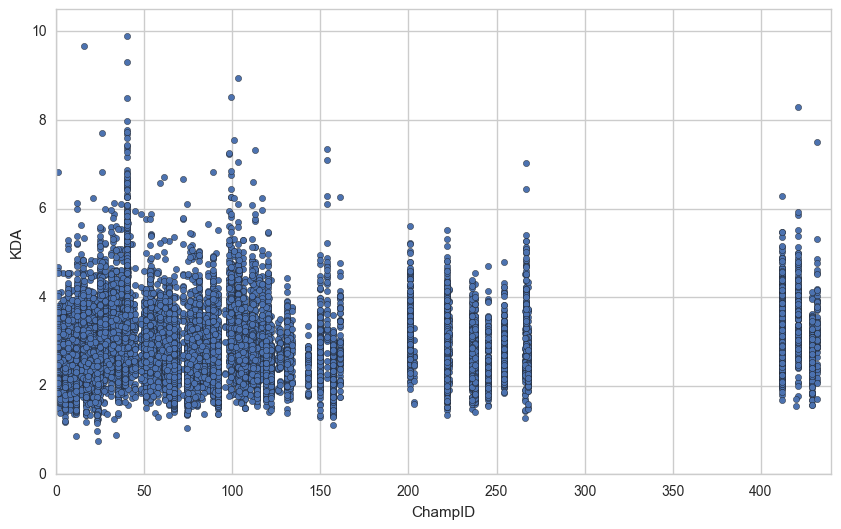

In [37]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['KDA'])
plt.xlabel('ChampID')
plt.ylabel('KDA')
plt.xlim(0, 440)
plt.ylim(0, 10.5)
plt.show()

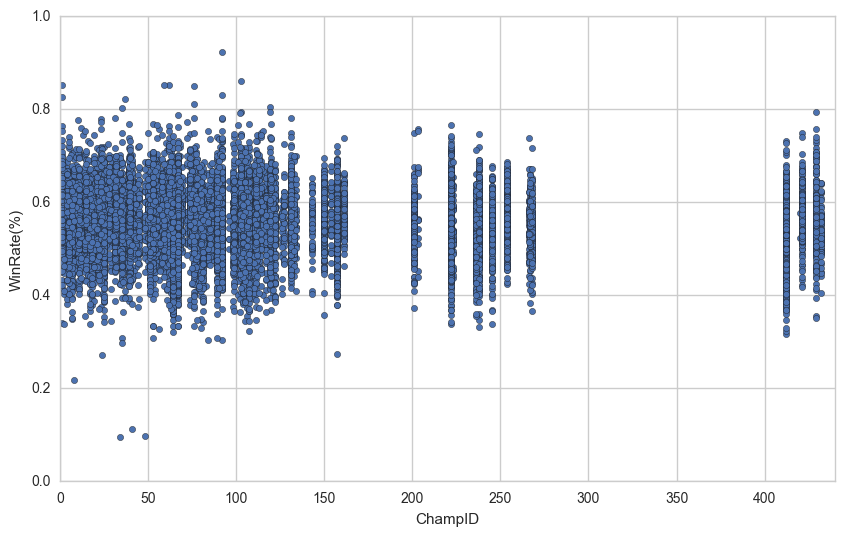

In [38]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['WinRate'])
plt.xlabel('ChampID')
plt.ylabel('WinRate(%)')
plt.xlim(0, 440)
plt.ylim(0, 1)
plt.show()

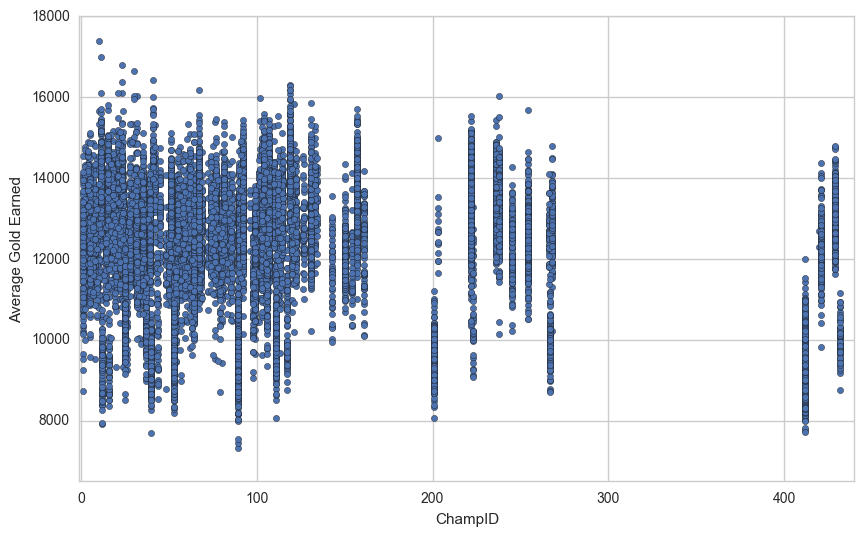

In [39]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['GoldEarned'])
plt.xlabel('ChampID')
plt.ylabel('Average Gold Earned')
plt.xlim(-1, 440)
plt.ylim(6500, 18000)
plt.show()

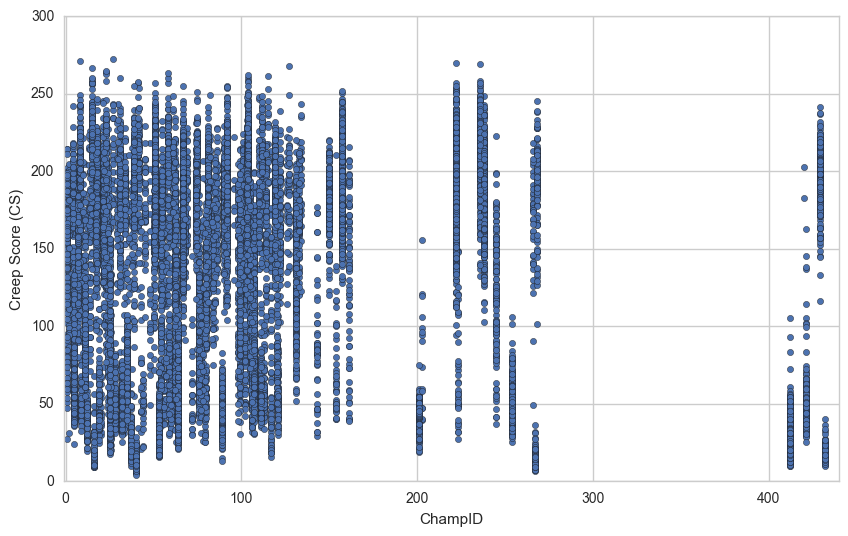

In [40]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champID'], df_pc['MinionKills'])
plt.xlabel('ChampID')
plt.ylabel('Creep Score (CS)')
plt.xlim(-1, 440)
plt.ylim(-0.05, 300)
plt.show()

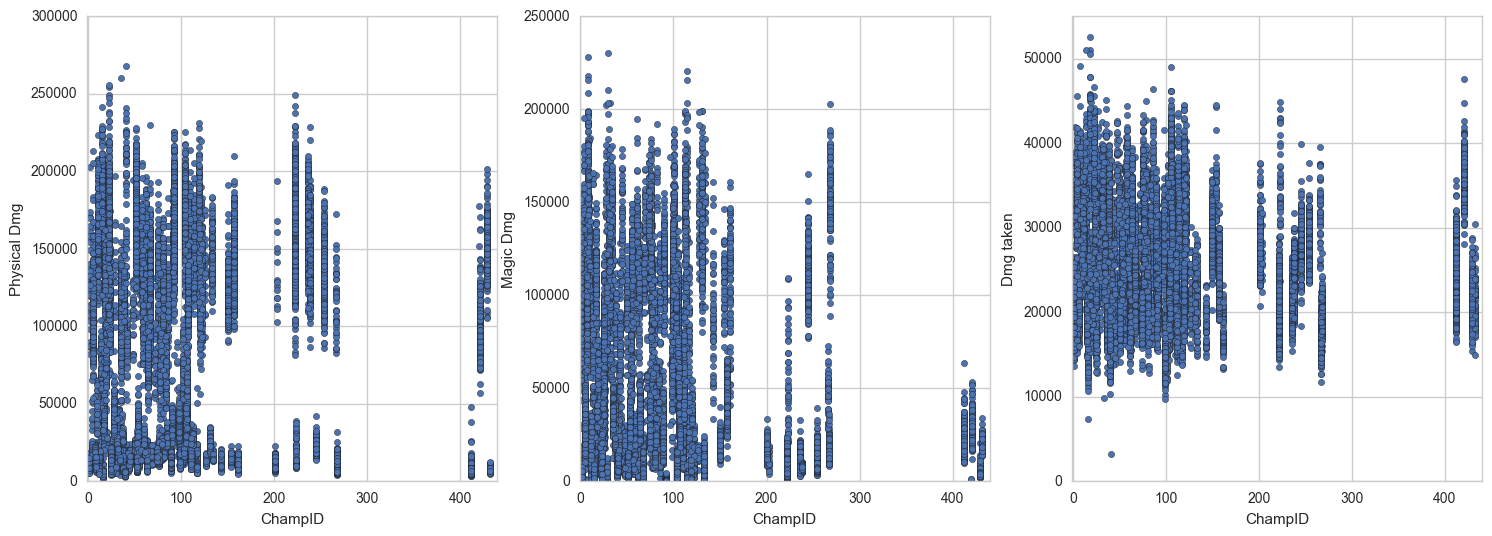

In [41]:
fig = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(df_pc['champID'], df_pc['PhysicalDamageDealt'])
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(df_pc['champID'], df_pc['MagicDamageDealt'])
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(df_pc['champID'], df_pc['DamageTaken'])
ax1.set_xlim([-1, 440])
ax1.set_ylim([0, 300000])
ax1.set_xlabel('ChampID')
ax1.set_ylabel('Physical Dmg')
ax2.set_xlim([-1, 440])
ax2.set_ylim([0, 250000])
ax2.set_xlabel('ChampID')
ax2.set_ylabel('Magic Dmg')
ax3.set_xlim([-1, 440])
ax3.set_ylim([0, 55000])
ax3.set_xlabel('ChampID')
ax3.set_ylabel('Dmg taken')
plt.show()

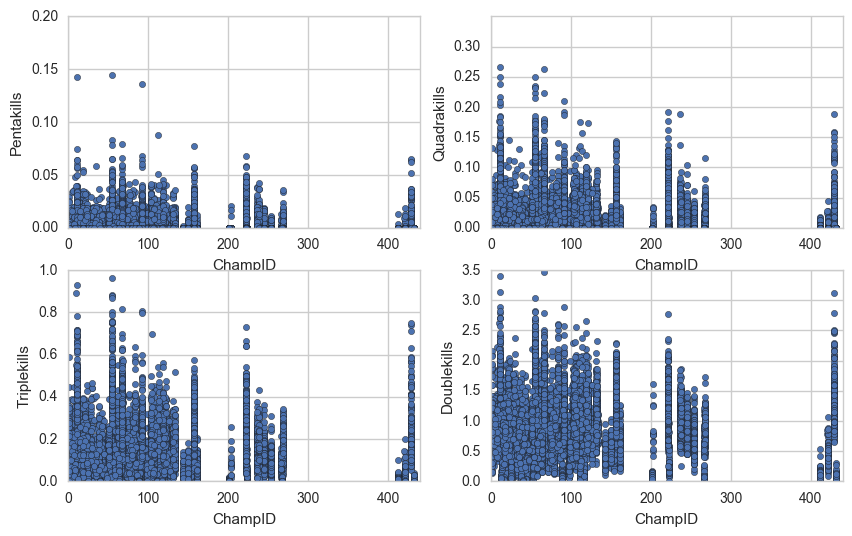

In [42]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df_pc['champID'], df_pc['PentaKills'])
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df_pc['champID'], df_pc['QuadraKills'])
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df_pc['champID'], df_pc['TripleKills'])
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(df_pc['champID'], df_pc['DoubleKills'])
ax1.set_xlim([-0.5, 440])
ax1.set_ylim([0, 0.2])
ax1.set_xlabel('ChampID')
ax1.set_ylabel('Pentakills')
ax2.set_xlim([-0.5, 440])
ax2.set_ylim([0, 0.35])
ax2.set_xlabel('ChampID')
ax2.set_ylabel('Quadrakills')
ax3.set_xlim([-0.5, 440])
ax3.set_ylim([0, 1])
ax3.set_xlabel('ChampID')
ax3.set_ylabel('Triplekills')
ax4.set_xlim([-0.5, 440])
ax4.set_ylim([0, 3.5])
ax4.set_xlabel('ChampID')
ax4.set_ylabel('Doublekills')
plt.show()

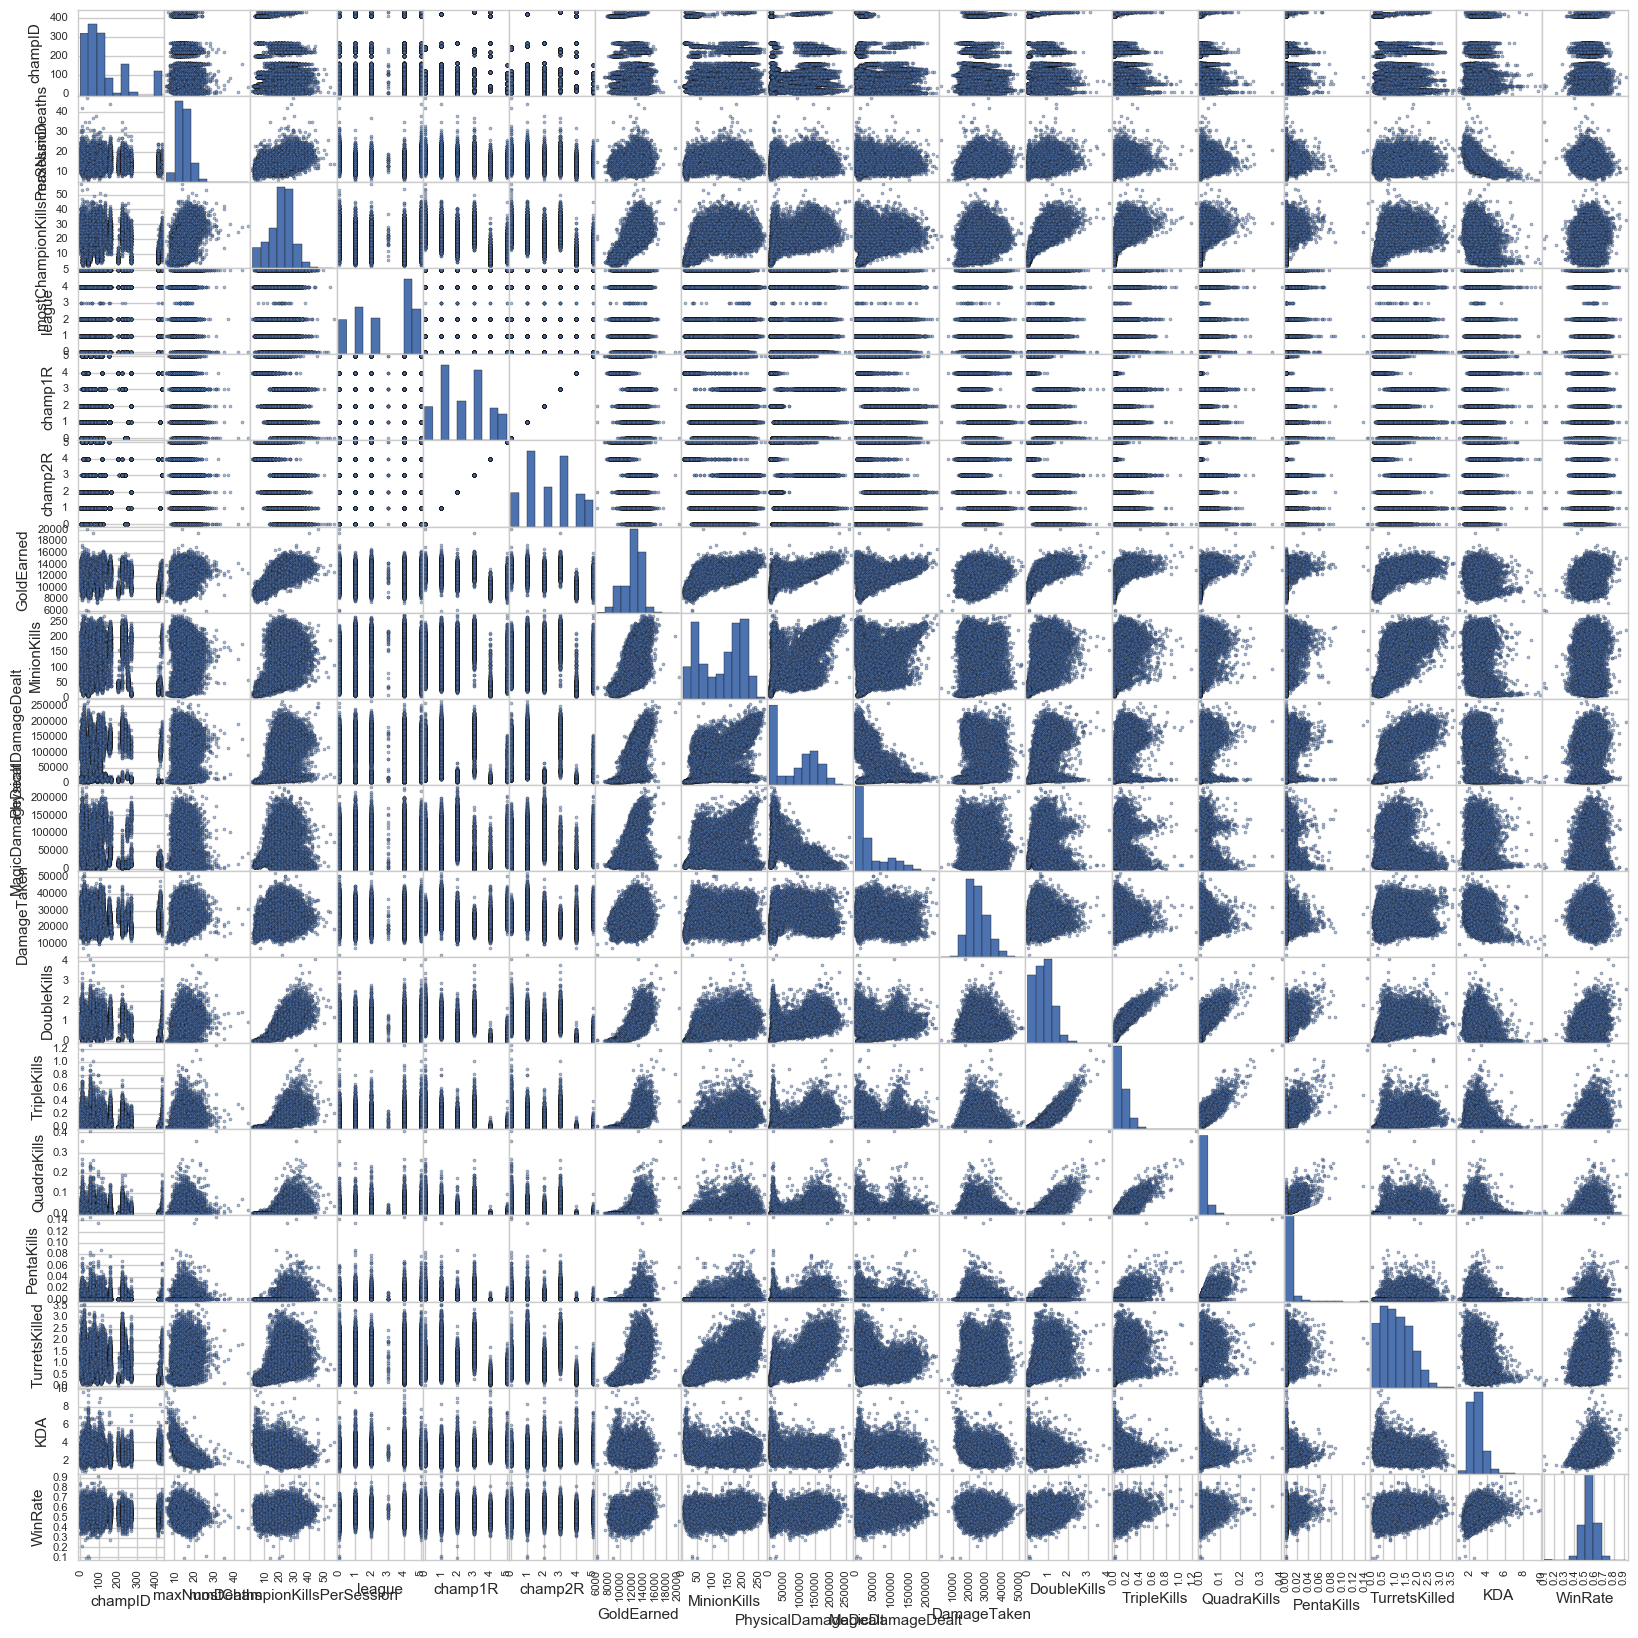

In [43]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_pc, figsize = (20,20))
plt.show()

## Data visualization by Tag1 

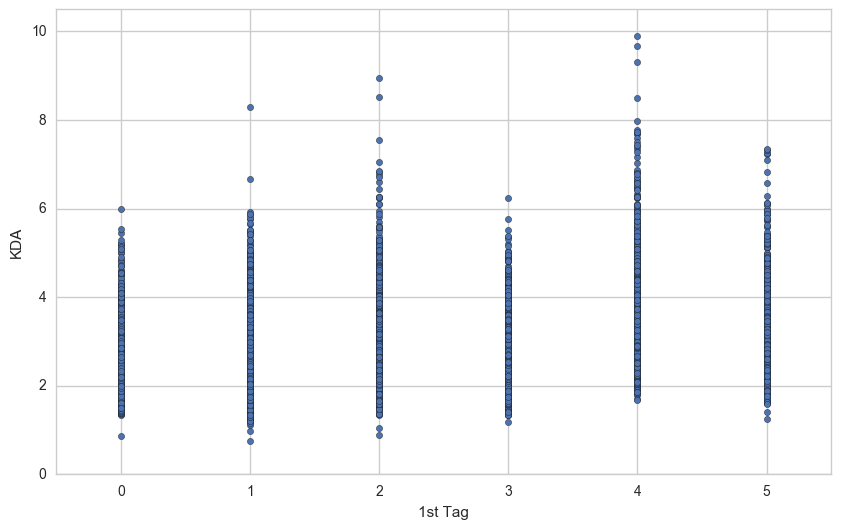

In [44]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champ1R'], df_pc['KDA'])
plt.xlabel('1st Tag')
plt.ylabel('KDA')
plt.xlim(-0.5, 5.5)
plt.ylim(0, 10.5)
plt.show()

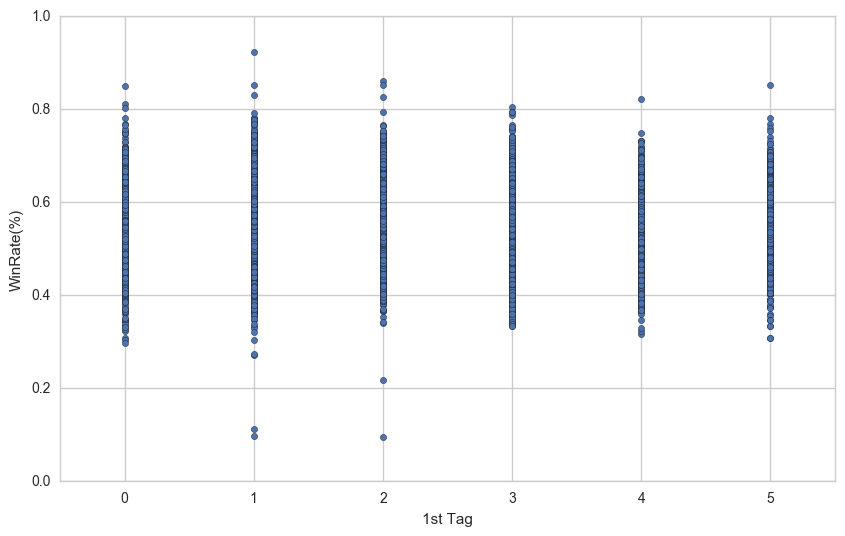

In [45]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champ1R'], df_pc['WinRate'])
plt.xlabel('1st Tag')
plt.ylabel('WinRate(%)')
plt.xlim(-0.5,5.5)
plt.ylim(0, 1)
plt.show()

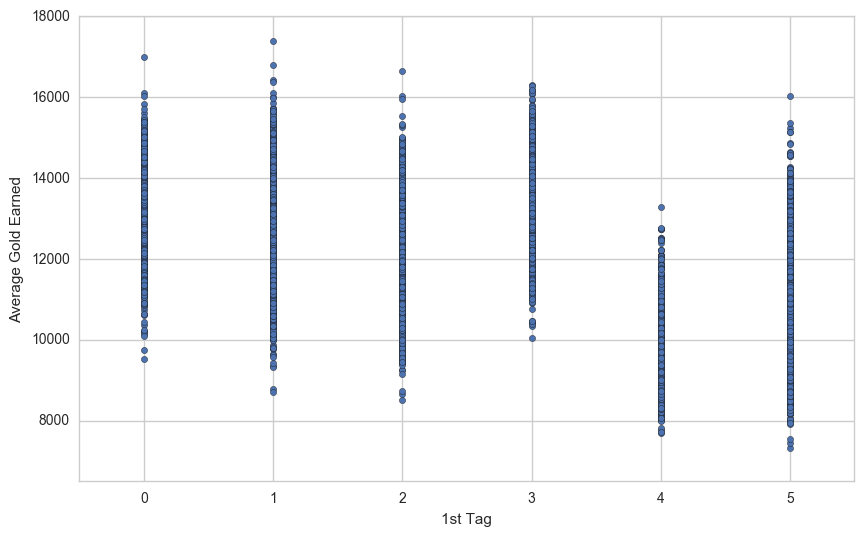

In [46]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champ1R'], df_pc['GoldEarned'])
plt.xlabel('1st Tag')
plt.ylabel('Average Gold Earned')
plt.xlim(-0.5,5.5)
plt.ylim(6500, 18000)
plt.show()

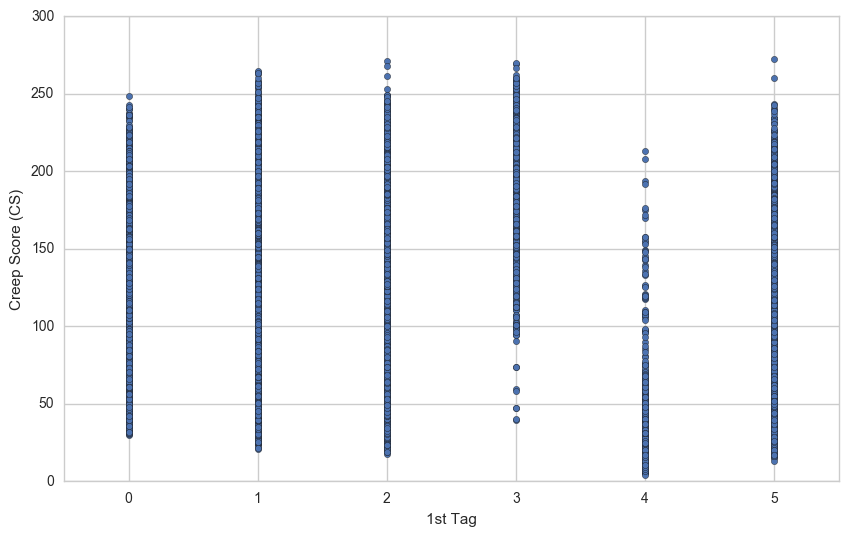

In [47]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['champ1R'], df_pc['MinionKills'])
plt.xlabel('1st Tag')
plt.ylabel('Creep Score (CS)')
plt.xlim(-0.5, 5.5)
plt.ylim(-0.05, 300)
plt.show()

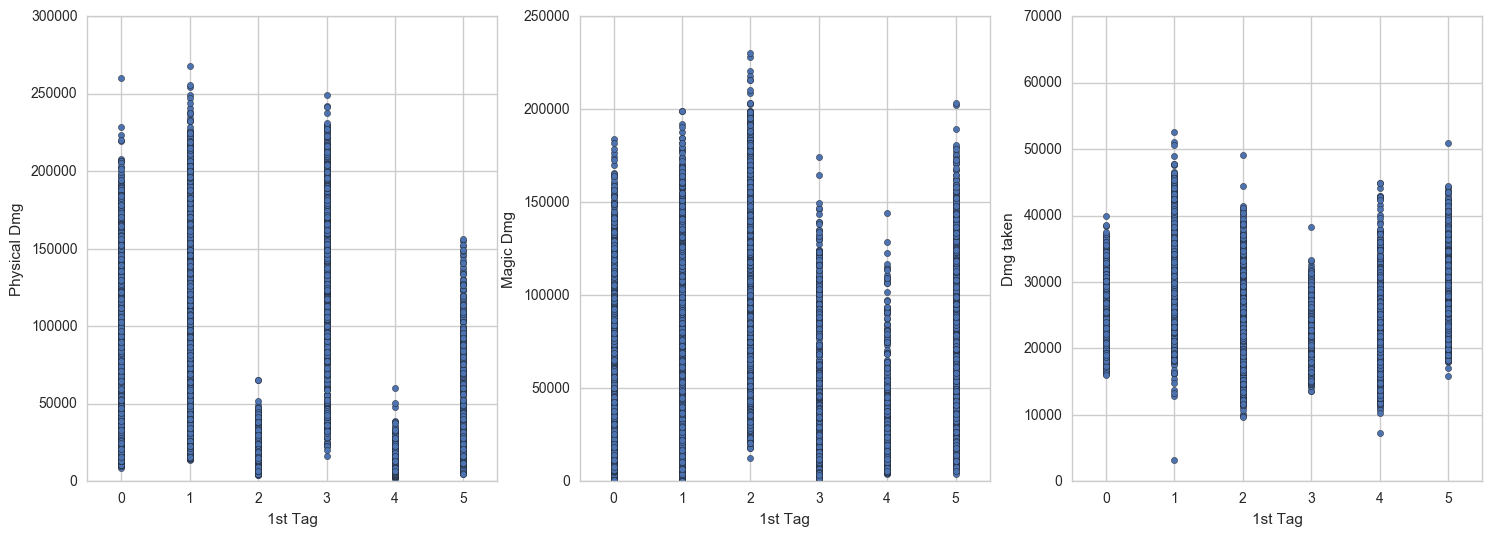

In [48]:
fig = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(df_pc['champ1R'], df_pc['PhysicalDamageDealt'])
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(df_pc['champ1R'], df_pc['MagicDamageDealt'])
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(df_pc['champ1R'], df_pc['DamageTaken'])
ax1.set_xlim([-0.5, 5.5])
ax1.set_ylim([0, 300000])
ax1.set_xlabel('1st Tag')
ax1.set_ylabel('Physical Dmg')
ax2.set_xlim([-0.5, 5.5])
ax2.set_ylim([0, 250000])
ax2.set_xlabel('1st Tag')
ax2.set_ylabel('Magic Dmg')
ax3.set_xlim([-0.5, 5.5])
ax3.set_ylim([0, 70000])
ax3.set_xlabel('1st Tag')
ax3.set_ylabel('Dmg taken')
plt.show()

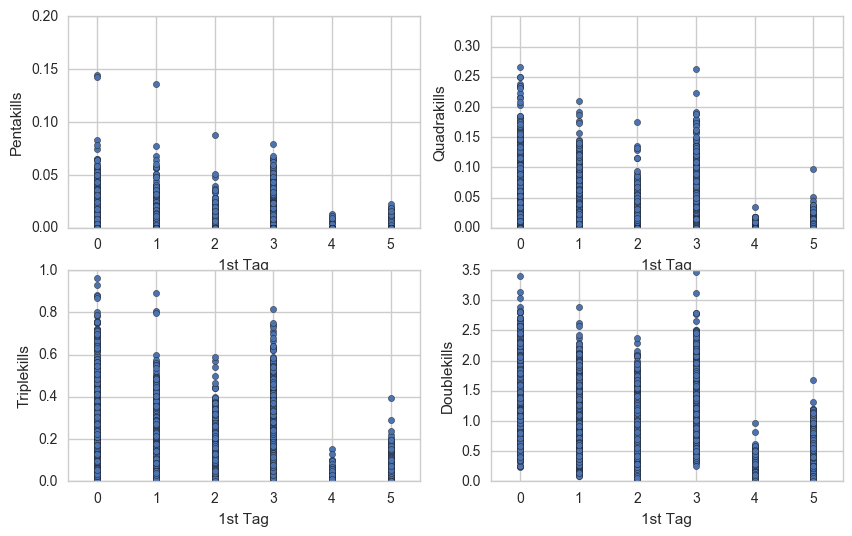

In [49]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df_pc['champ1R'], df_pc['PentaKills'])
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df_pc['champ1R'], df_pc['QuadraKills'])
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df_pc['champ1R'], df_pc['TripleKills'])
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(df_pc['champ1R'], df_pc['DoubleKills'])
ax1.set_xlim([-0.5, 5.5])
ax1.set_ylim([0, 0.2])
ax1.set_xlabel('1st Tag')
ax1.set_ylabel('Pentakills')
ax2.set_xlim([-0.5, 5.5])
ax2.set_ylim([0, 0.35])
ax2.set_xlabel('1st Tag')
ax2.set_ylabel('Quadrakills')
ax3.set_xlim([-0.5, 5.5])
ax3.set_ylim([0, 1])
ax3.set_xlabel('1st Tag')
ax3.set_ylabel('Triplekills')
ax4.set_xlim([-0.5, 5.5])
ax4.set_ylim([0, 3.5])
ax4.set_xlabel('1st Tag')
ax4.set_ylabel('Doublekills')
plt.show()

## Data visualization by player (all champions played)

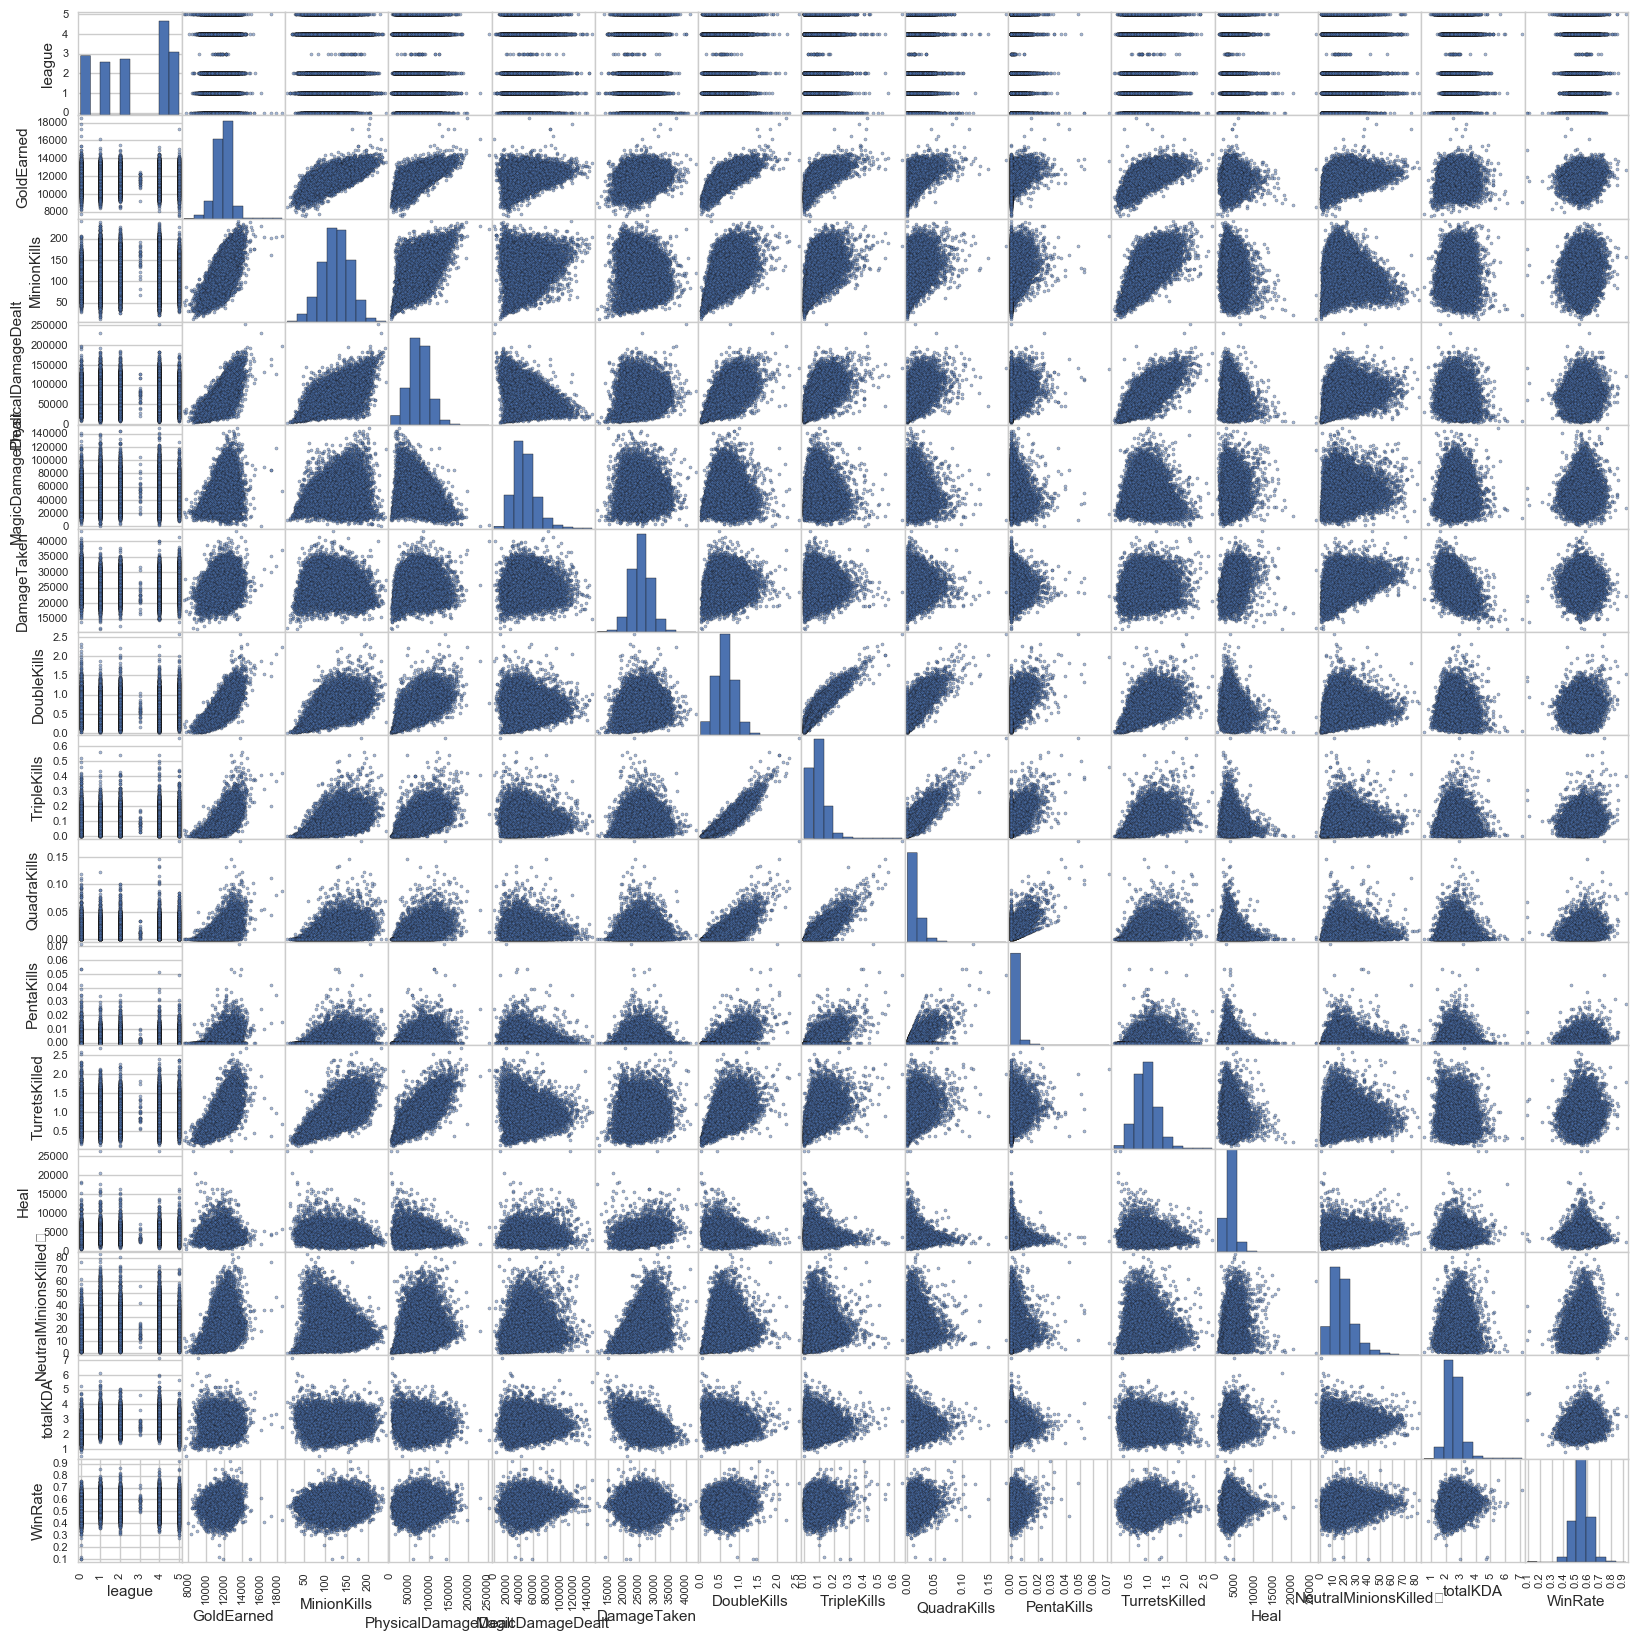

In [50]:
scatter_matrix(df_total, figsize = (20,20))
plt.show()

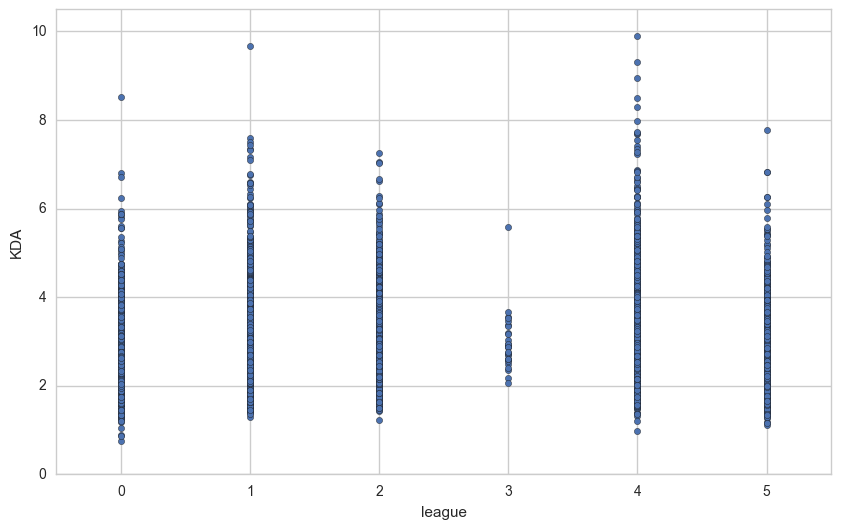

In [51]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['league'], df_pc['KDA'])
plt.xlabel('league')
plt.ylabel('KDA')
plt.xlim(-0.5, 5.5)
plt.ylim(0, 10.5)
plt.show()

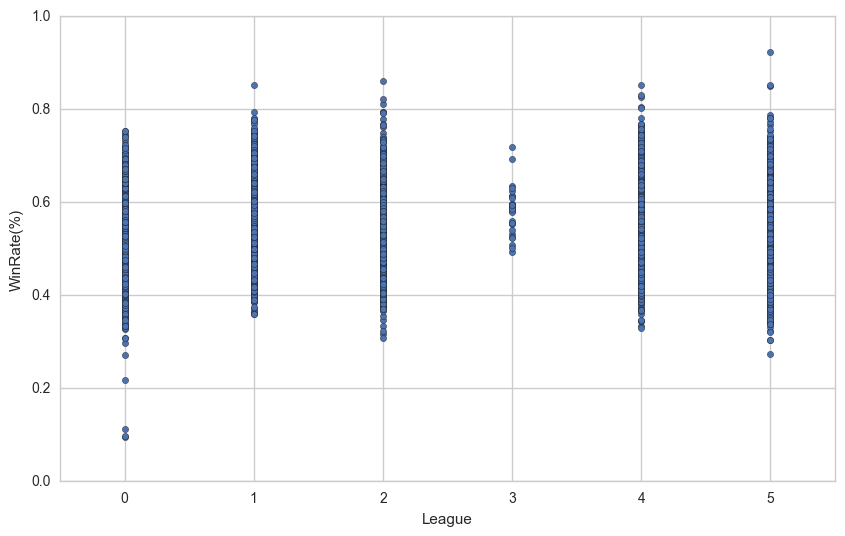

In [52]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['league'], df_pc['WinRate'])
plt.xlabel('League')
plt.ylabel('WinRate(%)')
plt.xlim(-0.5,5.5)
plt.ylim(0, 1)
plt.show()

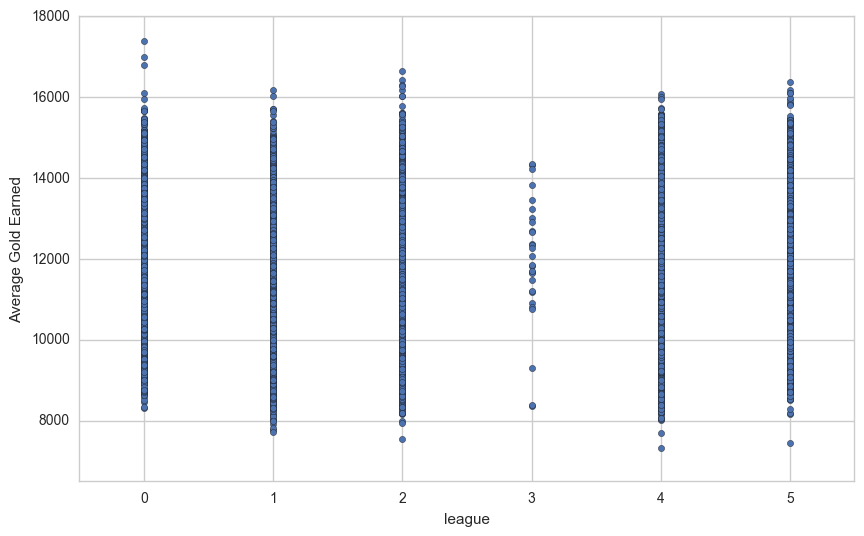

In [53]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['league'], df_pc['GoldEarned'])
plt.xlabel('league')
plt.ylabel('Average Gold Earned')
plt.xlim(-0.5,5.5)
plt.ylim(6500, 18000)
plt.show()

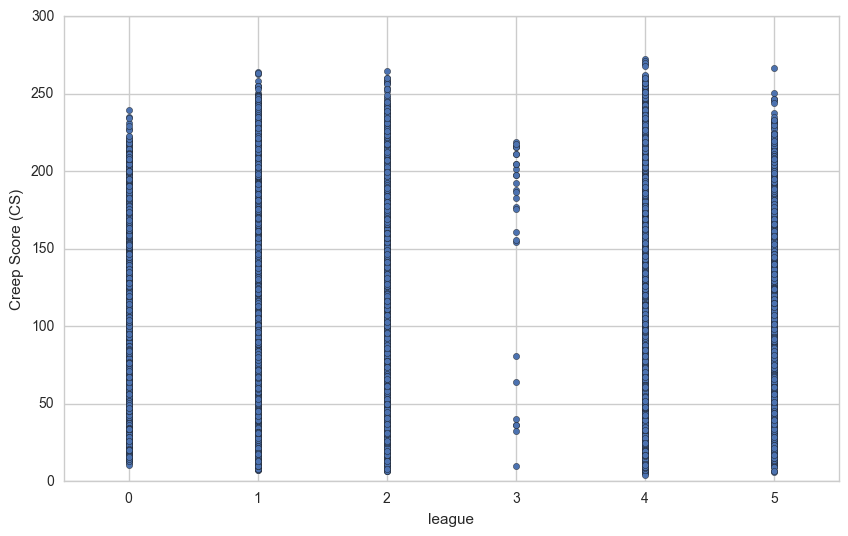

In [54]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.scatter(df_pc['league'], df_pc['MinionKills'])
plt.xlabel('league')
plt.ylabel('Creep Score (CS)')
plt.xlim(-0.5, 5.5)
plt.ylim(-0.05, 300)
plt.show()

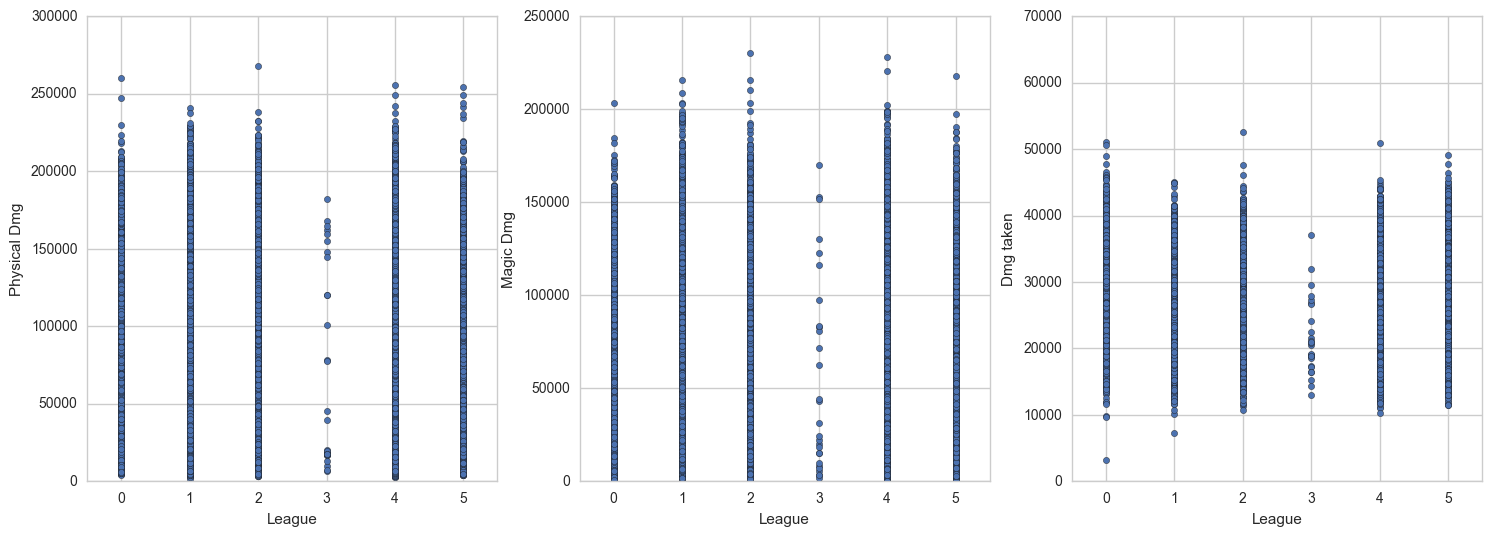

In [55]:
fig = plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1,3,1)
ax1.scatter(df_pc['league'], df_pc['PhysicalDamageDealt'])
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(df_pc['league'], df_pc['MagicDamageDealt'])
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(df_pc['league'], df_pc['DamageTaken'])
ax1.set_xlim([-0.5, 5.5])
ax1.set_ylim([0, 300000])
ax1.set_xlabel('League')
ax1.set_ylabel('Physical Dmg')
ax2.set_xlim([-0.5, 5.5])
ax2.set_ylim([0, 250000])
ax2.set_xlabel('League')
ax2.set_ylabel('Magic Dmg')
ax3.set_xlim([-0.5, 5.5])
ax3.set_ylim([0, 70000])
ax3.set_xlabel('League')
ax3.set_ylabel('Dmg taken')
plt.show()

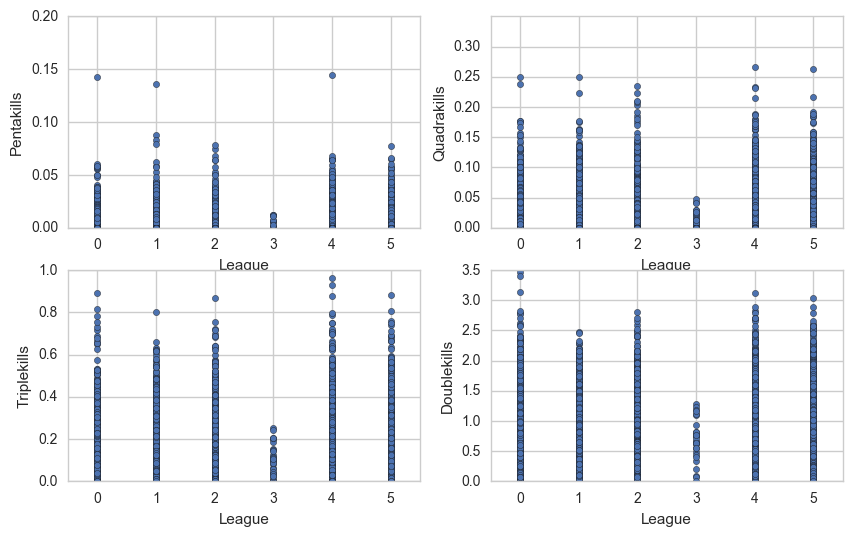

In [56]:
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df_pc['league'], df_pc['PentaKills'])
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(df_pc['league'], df_pc['QuadraKills'])
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(df_pc['league'], df_pc['TripleKills'])
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(df_pc['league'], df_pc['DoubleKills'])
ax1.set_xlim([-0.5, 5.5])
ax1.set_ylim([0, 0.2])
ax1.set_xlabel('League')
ax1.set_ylabel('Pentakills')
ax2.set_xlim([-0.5, 5.5])
ax2.set_ylim([0, 0.35])
ax2.set_xlabel('League')
ax2.set_ylabel('Quadrakills')
ax3.set_xlim([-0.5, 5.5])
ax3.set_ylim([0, 1])
ax3.set_xlabel('League')
ax3.set_ylabel('Triplekills')
ax4.set_xlim([-0.5, 5.5])
ax4.set_ylim([0, 3.5])
ax4.set_xlabel('League')
ax4.set_ylabel('Doublekills')
plt.show()

## Export the processed data

In [57]:
df_pc.to_pickle('pc_processed.pkl')

In [58]:
df_total.to_pickle('total_processed.pkl')